In [4]:
import numpy as np
import imutils
import cv2
import os
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc('image',cmap='gray',interpolation='bicubic')

In [3]:
from keras.preprocessing import image

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dty

In [5]:
path_1 = './../data/Images/New_Files/New_Files/'
path_2 = './../data/Masks/New_Masks/New_Masks/'
#new_path = './../augmented_data/images'

In [6]:
img_file = glob.glob(path_1+'*.jpg')
out_file = glob.glob(path_2+"*.jpg")
print(len(img_file),len(out_file))

(2448, 2448)


In [7]:
x = np.zeros((2448,1024,1024),dtype=np.float32)
y = np.zeros((2448,1024,1024),dtype=np.float32)

In [9]:
for i in range(x.shape[0]):
    img = imread(img_file[i])
    out = imread(out_file[i])
    gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_out = cv2.cvtColor(out,cv2.COLOR_BGR2GRAY)
    gray_out = gray_out/255.0
    gray_out[gray_out<0.5]=0
    gray_out[gray_out>=0.5]=1
    x[i]=gray_img
    y[i]=gray_out

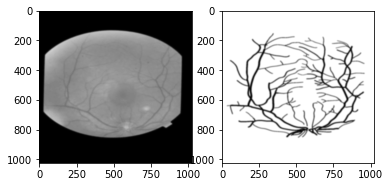

In [10]:
subplot(121)
imshow(x[0])
subplot(122)
imshow(y[0])

In [11]:
x.shape

(2448, 1024, 1024)

In [12]:
# np.save('X_train-100-orig-1024.npy',x)
# np.save('Y_train-100-orig-1024.npy',y)

In [11]:
X_train = np.load('X_train-100-orig-1024.npy')
Y_train = np.load('Y_train-100-orig-1024.npy')

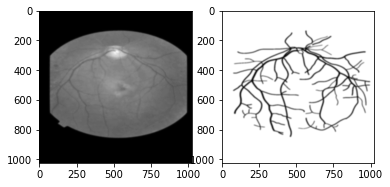

In [14]:
idx = np.random.randint(0,X_train.shape[0])
subplot(121)
imshow(X_train[idx])
subplot(122)
imshow(Y_train[idx])

In [8]:
from model import *
import numpy as np
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# from keras import backend as K
# K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=8, inter_op_parallelism_threads=8)))

/home/umer/.local/lib/python2.7/site-packages/scipy/signal/_max_len_seq.py:8: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._max_len_seq_inner import _max_len_seq_inner
/home/umer/.local/lib/python2.7/site-packages/scipy/signal/_upfirdn.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._upfirdn_apply import _output_len, _apply
/home/umer/.local/lib/python2.7/site-packages/scipy/optimize/_trlib/__init__.py:1: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._trlib import TRLIBQuadraticSubproblem
/home/umer/.local/lib/python2.7/site-packages/scipy/optimize/_numdiff.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._group_columns import group_dense, group_sparse
/home/umer/.local/lib/python2.7/site-packages/scipy/signal/spectral.py:10: RuntimeWar

In [9]:
model = unet()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1024, 1024, 6 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1024, 1024, 6 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 512, 512, 64) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

model.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


In [17]:
# X_train=np.load('./X_train-100-orig-1024.npy')
# Y_train = np.load('./Y_train-100-orig-1024.npy')

In [13]:
X_train.shape

(2448, 1024, 1024)

In [14]:
print X_train.shape,Y_train.shape

(2448, 1024, 1024) (2448, 1024, 1024)


In [15]:
X_train = X_train.reshape(X_train.shape+(1,))
Y_train = Y_train.reshape(Y_train.shape+(1,))

In [16]:
print X_train.shape,Y_train.shape

(2448, 1024, 1024, 1) (2448, 1024, 1024, 1)


In [17]:
np.unique(Y_train[0])

array([0., 1.], dtype=float32)

In [18]:
X_train = (X_train/255.0)-0.5

Populating the interactive namespace from numpy and matplotlib
(1024, 1024, 1)


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['maximum', 'minimum', 'copy', 'multiply', 'average', 'dot', 'get', 'concatenate', 'add', 'subtract']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


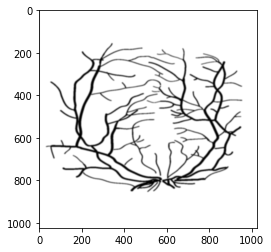

In [19]:
%pylab inline
imshow(Y_train[0][:,:,0],cmap = 'gray')
print(X_train[0].shape)

In [20]:
np.array(X_train.shape)

array([2448, 1024, 1024,    1])

In [26]:
(2448*1024*1024*4)/1024.0/1024.0/1024.0

9.5625

In [ ]:
model.fit(X_train,Y_train,batch_size=2,epochs=10,validation_split=0.1,class_weight = [0.8,0.2])

Train on 2203 samples, validate on 245 samples
Epoch 1/10
2203/2203 [==============================] - 1013s 460ms/step - loss: 0.1651 - acc: 0.9396 - val_loss: 0.1358 - val_acc: 0.9534
Epoch 2/10
2203/2203 [==============================] - 1009s 458ms/step - loss: 0.1218 - acc: 0.9558 - val_loss: 0.1100 - val_acc: 0.9570
Epoch 3/10
2203/2203 [==============================] - 1008s 457ms/step - loss: 0.1070 - acc: 0.9581 - val_loss: 0.1045 - val_acc: 0.9590
Epoch 4/10
2203/2203 [==============================] - 1006s 457ms/step - loss: 0.1034 - acc: 0.9592 - val_loss: 0.1058 - val_acc: 0.9587
Epoch 5/10
2203/2203 [==============================] - 1005s 456ms/step - loss: 0.1010 - acc: 0.9599 - val_loss: 0.1013 - val_acc: 0.9598
Epoch 6/10
2203/2203 [==============================] - 1006s 457ms/step - loss: 0.0987 - acc: 0.9605 - val_loss: 0.1003 - val_acc: 0.9600
Epoch 7/10
2203/2203 [==============================] - 1005s 456ms/step - loss: 0.0962 - acc: 0.9612 - val_loss: 0.097

In [28]:
model.save('./final_model_original_augmented_Iteration_2.h5')

In [15]:
from keras.models import load_model
model = load_model('./final_model_original_augmented_Iteration_2.h5')

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/usr/local/lib/python2.7/dist-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/home/umer/.local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dty

Populating the interactive namespace from numpy and matplotlib
52


False

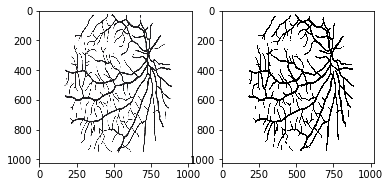

In [13]:
# import cv2
# import os
# from PIL import Image
# %pylab inline
# path = './../data/Test/Test_Images/'
# files = os.listdir(path)
# b=1
# a = 0
# print(len(files))
# #for i in files:
# image = cv2.imread('./../data/Test/Test_labels/0_label.jpg')
# gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# gray_img = (gray_img / 255.0)-0.5
# reshaped_img = gray_img.reshape((1,)+gray_img.shape+(1,))
# o = model.predict(reshaped_img)
# o[o<=0.5]=0
# o[o>0.5]=1
# subplot(121)
# imshow(image)
# subplot(122)
# imshow(o[0,:,:,0],cmap = 'gray')
# cv2.imwrite(os.path.join('{}_predicted.jpg'.format(a)), o)
# #a = a+1

In [44]:


img_path_1 = './../data/Test/Test_Images/im0001.ppm'
img_path_2 = './../data/Test/Test_Images/im0002.ppm'
img_path_3 = './../data/Test/Test_Images/im0003.ppm'
img_path_4 = './../data/Test/Test_Images/im0004.ppm'
img_path_5 = './../data/Test/Test_Images/im0005.ppm'
img_path_6 = './../data/Test/Test_Images/im0006.ppm'
img_path_7 = './../data/Test/Test_Images/im0007.ppm'
img_path_8 = './../data/Test/Test_Images/im0008.ppm'
img_path_9 = './../data/Test/Test_Images/im0009.ppm'
img_path_10 = './../data/Test/Test_Images/im0010.ppm'
img_path_11 = './../data/Test/Test_Images/im0011.ppm'
img_path_12 = './../data/Test/Test_Images/im0012.ppm'
img_path_13 = './../data/Test/Test_Images/im0013.ppm'
img_path_14 = './../data/Test/Test_Images/im0014.ppm'
img_path_15 = './../data/Test/Test_Images/im0015.ppm'
img_path_16 = './../data/Test/Test_Images/im0016.ppm'
img_path_17 = './../data/Test/Test_Images/im0017.ppm'
img_path_18 = './../data/Test/Test_Images/im0018.ppm'
img_path_19 = './../data/Test/Test_Images/im0019.ppm'
img_path_20 = './../data/Test/Test_Images/im0020.ppm'
img_path_21 = './../data/Test/Test_Images/im0021.ppm'
img_path_22 = './../data/Test/Test_Images/im0022.ppm'
img_path_23 = './../data/Test/Test_Images/im0023.ppm'
img_path_24 = './../data/Test/Test_Images/im0024.ppm'
img_path_25 = './../data/Test/Test_Images/im0025.ppm'
img_path_26 = './../data/Test/Test_Images/im0026.ppm'
img_path_27 = './../data/Test/Test_Images/im0027.ppm'
img_path_28 = './../data/Test/Test_Images/im0028.ppm'
img_path_29 = './../data/Test/Test_Images/im0029.ppm'
img_path_30 = './../data/Test/Test_Images/im0030.ppm'
img_path_31 = './../data/Test/Test_Images/im0031.ppm'
img_path_32 = './../data/Test/Test_Images/im0032.ppm'
img_path_33 = './../data/Test/Test_Images/im0033.ppm'
img_path_34 = './../data/Test/Test_Images/im0034.ppm'
img_path_35 = './../data/Test/Test_Images/im0035.ppm'
img_path_36 = './../data/Test/Test_Images/im0036.ppm'
img_path_37 = './../data/Test/Test_Images/im0037.ppm'
img_path_38 = './../data/Test/Test_Images/im0038.ppm'
img_path_39 = './../data/Test/Test_Images/im0039.ppm'
img_path_40 = './../data/Test/Test_Images/im0040.ppm'
img_path_41 = './../data/Test/Test_Images/im0041.ppm'
img_path_42 = './../data/Test/Test_Images/im0042.ppm'
img_path_43 = './../data/Test/Test_Images/im0043.ppm'
img_path_44 = './../data/Test/Test_Images/im0044.ppm'
img_path_45 = './../data/Test/Test_Images/im0045.ppm'
img_path_46 = './../data/Test/Test_Images/im0046.ppm'
img_path_48 = './../data/Test/Test_Images/im0048.ppm'
img_path_49 = './../data/Test/Test_Images/im0049.ppm'
img_path_50 = './../data/Test/Test_Images/im0050.ppm'
img_path_51 = './../data/Test/Test_Images/im0051.ppm'
img_path_52 = './../data/Test/Test_Images/im0052.ppm'
img_path_53 = './../data/Test/Test_Images/im0053.ppm'
img_path_54 = './../data/Test/Test_Images/im0054.ppm'
img_path_55 = './../data/Test/Test_Images/im0055.ppm'
img_path_56 = './../data/Test/Test_Images/im0056.ppm'
img_path_57 = './../data/Test/Test_Images/im0057.ppm'
img_path_58 = './../data/Test/Test_Images/im0058.ppm'
img_path_59 = './../data/Test/Test_Images/im0059.ppm'
img_path_60 = './../data/Test/Test_Images/im0060.ppm'
img_path_61 = './../data/Test/Test_Images/im0061.ppm'
img_path_62 = './../data/Test/Test_Images/im0062.ppm'
img_path_63 = './../data/Test/Test_Images/im0063.ppm'
img_path_64 = './../data/Test/Test_Images/im0064.ppm'
img_path_65 = './../data/Test/Test_Images/im0065.ppm'
img_path_66 = './../data/Test/Test_Images/im0066.ppm'

# out_path_1 = './../data/Test/Test_labels/0_label.jpg'
# out_path_2 = './../data/Test/Test_labels/1_label.jpg'
# out_path_3 = './../data/Test/Test_labels/2_label.jpg'
# out_path_4 = './../data/Test/Test_labels/3_label.jpg'
# out_path_5 = './../data/Test/Test_labels/4_label.jpg'
# out_path_6 = './../data/Test/Test_labels/5_label.jpg'
# out_path_7 = './../data/Test/Test_labels/6_label.jpg'
# out_path_8 = './../data/Test/Test_labels/7_label.jpg'
# out_path_9 = './../data/Test/Test_labels/8_label.jpg'
# out_path_10 = './../data/Test/Test_labels/9_label.jpg'
# out_path_11 = './../data/Test/Test_labels/10_label.jpg'
# out_path_12 = './../data/Test/Test_labels/11_label.jpg'
# out_path_13 = './../data/Test/Test_labels/12_label.jpg'
# out_path_14 = './../data/Test/Test_labels/13_label.jpg'
# out_path_15 = './../data/Test/Test_labels/14_label.jpg'
# out_path_16 = './../data/Test/Test_labels/15_label.jpg'
# out_path_17 = './../data/Test/Test_labels/16_label.jpg'
# out_path_18 = './../data/Test/Test_labels/17_label.jpg'
# out_path_19 = './../data/Test/Test_labels/18_label.jpg'
# out_path_20 = './../data/Test/Test_labels/19_label.jpg'

In [46]:
import cv2
img_1 = imread(img_path_1)
img_2 = imread(img_path_2)
img_3 = imread(img_path_3)
img_4 = imread(img_path_4)
img_5 = imread(img_path_5)
img_6 = imread(img_path_6)
img_7 = imread(img_path_7)
img_8 = imread(img_path_8)
img_9 = imread(img_path_9)
img_10 = imread(img_path_10)
img_11 = imread(img_path_11)
img_12 = imread(img_path_12)
img_13 = imread(img_path_13)
img_14 = imread(img_path_14)
img_15 = imread(img_path_15)
img_16 = imread(img_path_16)
img_17 = imread(img_path_17)
img_18 = imread(img_path_18)
img_19 = imread(img_path_19)
img_20 = imread(img_path_20)
img_21 = imread(img_path_21)
img_22 = imread(img_path_22)
img_23 = imread(img_path_23)
img_24 = imread(img_path_24)
img_25 = imread(img_path_25)
img_26 = imread(img_path_26)
img_27 = imread(img_path_27)
img_28 = imread(img_path_28)
img_29 = imread(img_path_29)
img_30 = imread(img_path_30)
img_31 = imread(img_path_31)
img_32 = imread(img_path_32)
img_33 = imread(img_path_33)
img_34 = imread(img_path_34)
img_35 = imread(img_path_35)
img_36 = imread(img_path_36)
img_37 = imread(img_path_37)
img_38 = imread(img_path_38)
img_39 = imread(img_path_39)
img_40 = imread(img_path_40)
img_41 = imread(img_path_41)
img_42 = imread(img_path_42)
img_43 = imread(img_path_43)
img_44 = imread(img_path_44)
img_45 = imread(img_path_45)
img_46 = imread(img_path_46)
img_48 = imread(img_path_48)
img_49 = imread(img_path_49)
img_50 = imread(img_path_50)
img_51 = imread(img_path_51)
img_52 = imread(img_path_52)
img_53 = imread(img_path_53)
img_54 = imread(img_path_54)
img_55 = imread(img_path_55)
img_56 = imread(img_path_56)
img_57 = imread(img_path_57)
img_58 = imread(img_path_58)
img_59 = imread(img_path_59)
img_60 = imread(img_path_60)
img_61 = imread(img_path_61)
img_62 = imread(img_path_62)
img_63 = imread(img_path_63)
img_64 = imread(img_path_64)
img_65 = imread(img_path_65)
img_66 = imread(img_path_66)
# out_1 = imread(out_path_1)
# out_2 = imread(out_path_2)
# out_3 = imread(out_path_3)
# out_4 = imread(out_path_4)
# out_5 = imread(out_path_5)
# out_6 = imread(out_path_6)
# out_7 = imread(out_path_7)
# out_8 = imread(out_path_8)
# out_9 = imread(out_path_9)
# out_10 = imread(out_path_10)
# out_11 = imread(out_path_11)
# out_12 = imread(out_path_12)
# out_13 = imread(out_path_13)
# out_14 = imread(out_path_14)
# out_15 = imread(out_path_15)
# out_16 = imread(out_path_16)
# out_17 = imread(out_path_17)
# out_18 = imread(out_path_18)
# out_19 = imread(out_path_19)
# out_20 = imread(out_path_20)

(605, 700, 3)

In [48]:
import cv2
 
# img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img_1.shape)
 
width = 1024
height = 1024
dim = (width, height)
 
# resize image
img_1 = cv2.resize(img_1, dim, interpolation = cv2.INTER_AREA)
img_2 = cv2.resize(img_2, dim, interpolation = cv2.INTER_AREA)
img_3 = cv2.resize(img_3, dim, interpolation = cv2.INTER_AREA)
img_4 = cv2.resize(img_4, dim, interpolation = cv2.INTER_AREA)
img_5 = cv2.resize(img_5, dim, interpolation = cv2.INTER_AREA)
img_6 = cv2.resize(img_6, dim, interpolation = cv2.INTER_AREA)
img_7 = cv2.resize(img_7, dim, interpolation = cv2.INTER_AREA)
img_8 = cv2.resize(img_8, dim, interpolation = cv2.INTER_AREA)
img_9 = cv2.resize(img_9, dim, interpolation = cv2.INTER_AREA)
img_10 = cv2.resize(img_10, dim, interpolation = cv2.INTER_AREA)
img_11= cv2.resize(img_11, dim, interpolation = cv2.INTER_AREA)
img_12= cv2.resize(img_12, dim, interpolation = cv2.INTER_AREA)
img_13= cv2.resize(img_13, dim, interpolation = cv2.INTER_AREA)
img_14 = cv2.resize(img_14, dim, interpolation = cv2.INTER_AREA)
img_15 = cv2.resize(img_15, dim, interpolation = cv2.INTER_AREA)
img_16 = cv2.resize(img_16, dim, interpolation = cv2.INTER_AREA)
img_17 = cv2.resize(img_17, dim, interpolation = cv2.INTER_AREA)
img_18 = cv2.resize(img_18, dim, interpolation = cv2.INTER_AREA)
img_19 = cv2.resize(img_19, dim, interpolation = cv2.INTER_AREA)
img_20 = cv2.resize(img_20, dim, interpolation = cv2.INTER_AREA)
img_21 = cv2.resize(img_21, dim, interpolation = cv2.INTER_AREA)
img_22 = cv2.resize(img_22, dim, interpolation = cv2.INTER_AREA)
img_23 = cv2.resize(img_23, dim, interpolation = cv2.INTER_AREA)
img_24 = cv2.resize(img_24, dim, interpolation = cv2.INTER_AREA)
img_25 = cv2.resize(img_25, dim, interpolation = cv2.INTER_AREA)
img_26 = cv2.resize(img_26, dim, interpolation = cv2.INTER_AREA)
img_27 = cv2.resize(img_27, dim, interpolation = cv2.INTER_AREA)
img_28 = cv2.resize(img_28, dim, interpolation = cv2.INTER_AREA)
img_29 = cv2.resize(img_29, dim, interpolation = cv2.INTER_AREA)
img_30 = cv2.resize(img_30, dim, interpolation = cv2.INTER_AREA)
img_31= cv2.resize(img_31, dim, interpolation = cv2.INTER_AREA)
img_32= cv2.resize(img_32, dim, interpolation = cv2.INTER_AREA)
img_33= cv2.resize(img_33, dim, interpolation = cv2.INTER_AREA)
img_34 = cv2.resize(img_34, dim, interpolation = cv2.INTER_AREA)
img_35 = cv2.resize(img_35, dim, interpolation = cv2.INTER_AREA)
img_36 = cv2.resize(img_36, dim, interpolation = cv2.INTER_AREA)
img_37 = cv2.resize(img_37, dim, interpolation = cv2.INTER_AREA)
img_38 = cv2.resize(img_38, dim, interpolation = cv2.INTER_AREA)
img_39 = cv2.resize(img_39, dim, interpolation = cv2.INTER_AREA)
img_40 = cv2.resize(img_40, dim, interpolation = cv2.INTER_AREA)
img_41 = cv2.resize(img_41, dim, interpolation = cv2.INTER_AREA)
img_42 = cv2.resize(img_42, dim, interpolation = cv2.INTER_AREA)
img_43 = cv2.resize(img_43, dim, interpolation = cv2.INTER_AREA)
img_44 = cv2.resize(img_44, dim, interpolation = cv2.INTER_AREA)
img_45 = cv2.resize(img_45, dim, interpolation = cv2.INTER_AREA)
img_46 = cv2.resize(img_46, dim, interpolation = cv2.INTER_AREA)
img_48 = cv2.resize(img_48, dim, interpolation = cv2.INTER_AREA)
img_49 = cv2.resize(img_49, dim, interpolation = cv2.INTER_AREA)
img_50 = cv2.resize(img_50, dim, interpolation = cv2.INTER_AREA)
img_51= cv2.resize(img_51, dim, interpolation = cv2.INTER_AREA)
img_52= cv2.resize(img_52, dim, interpolation = cv2.INTER_AREA)
img_53= cv2.resize(img_53, dim, interpolation = cv2.INTER_AREA)
img_54 = cv2.resize(img_54, dim, interpolation = cv2.INTER_AREA)
img_55 = cv2.resize(img_55, dim, interpolation = cv2.INTER_AREA)
img_56 = cv2.resize(img_56, dim, interpolation = cv2.INTER_AREA)
img_57 = cv2.resize(img_57, dim, interpolation = cv2.INTER_AREA)
img_58 = cv2.resize(img_58, dim, interpolation = cv2.INTER_AREA)
img_59 = cv2.resize(img_59, dim, interpolation = cv2.INTER_AREA)
img_60 = cv2.resize(img_60, dim, interpolation = cv2.INTER_AREA)
img_61 = cv2.resize(img_61, dim, interpolation = cv2.INTER_AREA)
img_62 = cv2.resize(img_62, dim, interpolation = cv2.INTER_AREA)
img_63 = cv2.resize(img_63, dim, interpolation = cv2.INTER_AREA)
img_64 = cv2.resize(img_64, dim, interpolation = cv2.INTER_AREA)
img_65 = cv2.resize(img_65, dim, interpolation = cv2.INTER_AREA)
img_66 = cv2.resize(img_66, dim, interpolation = cv2.INTER_AREA)

 
print('Resized Dimensions : ',img_1.shape)
print('Resized Dimensions : ',img_2.shape)
print('Resized Dimensions : ',img_3.shape)
print('Resized Dimensions : ',img_4.shape)
print('Resized Dimensions : ',img_5.shape)
print('Resized Dimensions : ',img_6.shape)
print('Resized Dimensions : ',img_7.shape)
print('Resized Dimensions : ',img_8.shape)
print('Resized Dimensions : ',img_9.shape)
print('Resized Dimensions : ',img_10.shape)
print('Resized Dimensions : ',img_11.shape)
print('Resized Dimensions : ',img_12.shape)
print('Resized Dimensions : ',img_13.shape)
print('Resized Dimensions : ',img_14.shape)
print('Resized Dimensions : ',img_15.shape)
print('Resized Dimensions : ',img_16.shape)
print('Resized Dimensions : ',img_17.shape)
print('Resized Dimensions : ',img_18.shape)
print('Resized Dimensions : ',img_19.shape)
print('Resized Dimensions : ',img_20.shape)

 

('Original Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))
('Resized Dimensions : ', (1024, 1024, 3))


In [ ]:
subplot(121)
imshow(img_1)
subplot(122)
imshow(out_1)

In [56]:
gray_img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
gray_img_2 = cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)
gray_img_3 = cv2.cvtColor(img_3,cv2.COLOR_BGR2GRAY)
gray_img_4 = cv2.cvtColor(img_4,cv2.COLOR_BGR2GRAY)
gray_img_5 = cv2.cvtColor(img_5,cv2.COLOR_BGR2GRAY)
gray_img_6 = cv2.cvtColor(img_6,cv2.COLOR_BGR2GRAY)
gray_img_7 = cv2.cvtColor(img_7,cv2.COLOR_BGR2GRAY)
gray_img_8 = cv2.cvtColor(img_8,cv2.COLOR_BGR2GRAY)
gray_img_9 = cv2.cvtColor(img_9,cv2.COLOR_BGR2GRAY)
gray_img_10 = cv2.cvtColor(img_10,cv2.COLOR_BGR2GRAY)
gray_img_11 = cv2.cvtColor(img_11,cv2.COLOR_BGR2GRAY)
gray_img_12 = cv2.cvtColor(img_12,cv2.COLOR_BGR2GRAY)
gray_img_13 = cv2.cvtColor(img_13,cv2.COLOR_BGR2GRAY)
gray_img_14 = cv2.cvtColor(img_14,cv2.COLOR_BGR2GRAY)
gray_img_15 = cv2.cvtColor(img_15,cv2.COLOR_BGR2GRAY)
gray_img_16 = cv2.cvtColor(img_16,cv2.COLOR_BGR2GRAY)
gray_img_17 = cv2.cvtColor(img_17,cv2.COLOR_BGR2GRAY)
gray_img_18 = cv2.cvtColor(img_18,cv2.COLOR_BGR2GRAY)
gray_img_19 = cv2.cvtColor(img_19,cv2.COLOR_BGR2GRAY)
gray_img_20 = cv2.cvtColor(img_20,cv2.COLOR_BGR2GRAY)
gray_img_21 = cv2.cvtColor(img_21,cv2.COLOR_BGR2GRAY)
gray_img_22 = cv2.cvtColor(img_22,cv2.COLOR_BGR2GRAY)
gray_img_23 = cv2.cvtColor(img_23,cv2.COLOR_BGR2GRAY)
gray_img_24 = cv2.cvtColor(img_24,cv2.COLOR_BGR2GRAY)
gray_img_25 = cv2.cvtColor(img_25,cv2.COLOR_BGR2GRAY)
gray_img_26 = cv2.cvtColor(img_26,cv2.COLOR_BGR2GRAY)
gray_img_27 = cv2.cvtColor(img_27,cv2.COLOR_BGR2GRAY)
gray_img_28 = cv2.cvtColor(img_28,cv2.COLOR_BGR2GRAY)
gray_img_29 = cv2.cvtColor(img_29,cv2.COLOR_BGR2GRAY)
gray_img_30 = cv2.cvtColor(img_30,cv2.COLOR_BGR2GRAY)
gray_img_31 = cv2.cvtColor(img_31,cv2.COLOR_BGR2GRAY)
gray_img_32 = cv2.cvtColor(img_32,cv2.COLOR_BGR2GRAY)
gray_img_33 = cv2.cvtColor(img_33,cv2.COLOR_BGR2GRAY)
gray_img_34 = cv2.cvtColor(img_34,cv2.COLOR_BGR2GRAY)
gray_img_35 = cv2.cvtColor(img_35,cv2.COLOR_BGR2GRAY)
gray_img_36 = cv2.cvtColor(img_36,cv2.COLOR_BGR2GRAY)
gray_img_37 = cv2.cvtColor(img_37,cv2.COLOR_BGR2GRAY)
gray_img_38 = cv2.cvtColor(img_38,cv2.COLOR_BGR2GRAY)
gray_img_39 = cv2.cvtColor(img_39,cv2.COLOR_BGR2GRAY)
gray_img_40 = cv2.cvtColor(img_40,cv2.COLOR_BGR2GRAY)
gray_img_41 = cv2.cvtColor(img_41,cv2.COLOR_BGR2GRAY)
gray_img_42 = cv2.cvtColor(img_42,cv2.COLOR_BGR2GRAY)
gray_img_43 = cv2.cvtColor(img_43,cv2.COLOR_BGR2GRAY)
gray_img_44 = cv2.cvtColor(img_44,cv2.COLOR_BGR2GRAY)
gray_img_45 = cv2.cvtColor(img_45,cv2.COLOR_BGR2GRAY)
gray_img_46 = cv2.cvtColor(img_46,cv2.COLOR_BGR2GRAY)
gray_img_48 = cv2.cvtColor(img_48,cv2.COLOR_BGR2GRAY)
gray_img_49 = cv2.cvtColor(img_49,cv2.COLOR_BGR2GRAY)
gray_img_50 = cv2.cvtColor(img_50,cv2.COLOR_BGR2GRAY)
gray_img_51 = cv2.cvtColor(img_51,cv2.COLOR_BGR2GRAY)
gray_img_52 = cv2.cvtColor(img_52,cv2.COLOR_BGR2GRAY)
gray_img_53 = cv2.cvtColor(img_53,cv2.COLOR_BGR2GRAY)
gray_img_54 = cv2.cvtColor(img_54,cv2.COLOR_BGR2GRAY)
gray_img_55 = cv2.cvtColor(img_55,cv2.COLOR_BGR2GRAY)
gray_img_56 = cv2.cvtColor(img_56,cv2.COLOR_BGR2GRAY)
gray_img_57 = cv2.cvtColor(img_57,cv2.COLOR_BGR2GRAY)
gray_img_58 = cv2.cvtColor(img_58,cv2.COLOR_BGR2GRAY)
gray_img_59 = cv2.cvtColor(img_59,cv2.COLOR_BGR2GRAY)
gray_img_60 = cv2.cvtColor(img_60,cv2.COLOR_BGR2GRAY)
gray_img_61 = cv2.cvtColor(img_61,cv2.COLOR_BGR2GRAY)
gray_img_62 = cv2.cvtColor(img_62,cv2.COLOR_BGR2GRAY)
gray_img_63 = cv2.cvtColor(img_63,cv2.COLOR_BGR2GRAY)
gray_img_64 = cv2.cvtColor(img_64,cv2.COLOR_BGR2GRAY)
gray_img_65 = cv2.cvtColor(img_65,cv2.COLOR_BGR2GRAY)
gray_img_66 = cv2.cvtColor(img_66,cv2.COLOR_BGR2GRAY)
# gray_out_1 = cv2.cvtColor(out_1,cv2.COLOR_BGR2GRAY)
# gray_out_2 = cv2.cvtColor(out_2,cv2.COLOR_BGR2GRAY)
# gray_out_3 = cv2.cvtColor(out_3,cv2.COLOR_BGR2GRAY)
# gray_out_4 = cv2.cvtColor(out_4,cv2.COLOR_BGR2GRAY)
# gray_out_5 = cv2.cvtColor(out_5,cv2.COLOR_BGR2GRAY)
# gray_out_6 = cv2.cvtColor(out_6,cv2.COLOR_BGR2GRAY)
# gray_out_7 = cv2.cvtColor(out_7,cv2.COLOR_BGR2GRAY)
# gray_out_8 = cv2.cvtColor(out_8,cv2.COLOR_BGR2GRAY)
# gray_out_9 = cv2.cvtColor(out_9,cv2.COLOR_BGR2GRAY)
# gray_out_10 = cv2.cvtColor(out_10,cv2.COLOR_BGR2GRAY)
# gray_out_11 = cv2.cvtColor(out_11,cv2.COLOR_BGR2GRAY)
# gray_out_12 = cv2.cvtColor(out_12,cv2.COLOR_BGR2GRAY)
# gray_out_13 = cv2.cvtColor(out_13,cv2.COLOR_BGR2GRAY)
# gray_out_14 = cv2.cvtColor(out_14,cv2.COLOR_BGR2GRAY)
# gray_out_15 = cv2.cvtColor(out_15,cv2.COLOR_BGR2GRAY)
# gray_out_16 = cv2.cvtColor(out_16,cv2.COLOR_BGR2GRAY)
# gray_out_17 = cv2.cvtColor(out_17,cv2.COLOR_BGR2GRAY)
# gray_out_18 = cv2.cvtColor(out_18,cv2.COLOR_BGR2GRAY)
# gray_out_19 = cv2.cvtColor(out_19,cv2.COLOR_BGR2GRAY)
# gray_out_20 = cv2.cvtColor(out_20,cv2.COLOR_BGR2GRAY)

In [ ]:
subplot(121)
imshow(gray_img,cmap = 'gray')
subplot(122)
imshow(gray_out,cmap = 'gray')

In [10]:
gray_out_1[gray_out_1<=128]=0
gray_out_1[gray_out_1>128]=1
gray_out_2[gray_out_2<=128]=0
gray_out_2[gray_out_2>128]=1
gray_out_3[gray_out_3<=128]=0
gray_out_3[gray_out_3>128]=1
gray_out_4[gray_out_4<=128]=0
gray_out_4[gray_out_4>128]=1
gray_out_5[gray_out_5<=128]=0
gray_out_5[gray_out_5>128]=1
gray_out_6[gray_out_6<=128]=0
gray_out_6[gray_out_6>128]=1
gray_out_7[gray_out_7<=128]=0
gray_out_7[gray_out_7>128]=1
gray_out_8[gray_out_8<=128]=0
gray_out_8[gray_out_8>128]=1
gray_out_9[gray_out_9<=128]=0
gray_out_9[gray_out_9>128]=1
gray_out_10[gray_out_10<=128]=0
gray_out_10[gray_out_10>128]=1
gray_out_11[gray_out_11<=128]=0
gray_out_11[gray_out_11>128]=1
gray_out_12[gray_out_12<=128]=0
gray_out_12[gray_out_12>128]=1
gray_out_13[gray_out_13<=128]=0
gray_out_13[gray_out_13>128]=1
gray_out_14[gray_out_14<=128]=0
gray_out_14[gray_out_14>128]=1
gray_out_15[gray_out_15<=128]=0
gray_out_15[gray_out_15>128]=1
gray_out_16[gray_out_16<=128]=0
gray_out_16[gray_out_16>128]=1
gray_out_17[gray_out_17<=128]=0
gray_out_17[gray_out_17>128]=1
gray_out_18[gray_out_18<=128]=0
gray_out_18[gray_out_18>128]=1
gray_out_19[gray_out_19<=128]=0
gray_out_19[gray_out_19>128]=1
gray_out_20[gray_out_20<=128]=0
gray_out_20[gray_out_20>128]=1

NameError: name 'gray_out_1' is not defined

In [ ]:
subplot(121)
imshow(gray_img,cmap = 'gray')
subplot(122)
imshow(gray_out,cmap = 'gray')

In [ ]:
np.unique(gray_out)

In [57]:
gray_img_1 = (gray_img_1 / 255.0)-0.5
gray_img_2 = (gray_img_2 / 255.0)-0.5
gray_img_3 = (gray_img_3 / 255.0)-0.5
gray_img_4 = (gray_img_4 / 255.0)-0.5
gray_img_5 = (gray_img_5 / 255.0)-0.5
gray_img_6 = (gray_img_6 / 255.0)-0.5
gray_img_7 = (gray_img_7 / 255.0)-0.5
gray_img_8 = (gray_img_8 / 255.0)-0.5
gray_img_9 = (gray_img_9 / 255.0)-0.5
gray_img_10 = (gray_img_10 / 255.0)-0.5
gray_img_11 = (gray_img_11 / 255.0)-0.5
gray_img_12 = (gray_img_12 / 255.0)-0.5
gray_img_13 = (gray_img_13 / 255.0)-0.5
gray_img_14 = (gray_img_14 / 255.0)-0.5
gray_img_15 = (gray_img_15 / 255.0)-0.5
gray_img_16 = (gray_img_16 / 255.0)-0.5
gray_img_17 = (gray_img_17 / 255.0)-0.5
gray_img_18 = (gray_img_18 / 255.0)-0.5
gray_img_19 = (gray_img_19 / 255.0)-0.5
gray_img_20 = (gray_img_20 / 255.0)-0.5
gray_img_21 = (gray_img_21 / 255.0)-0.5
gray_img_22 = (gray_img_22 / 255.0)-0.5
gray_img_23 = (gray_img_23 / 255.0)-0.5
gray_img_24 = (gray_img_24 / 255.0)-0.5
gray_img_25 = (gray_img_25 / 255.0)-0.5
gray_img_26 = (gray_img_26 / 255.0)-0.5
gray_img_27 = (gray_img_27 / 255.0)-0.5
gray_img_28 = (gray_img_28 / 255.0)-0.5
gray_img_29 = (gray_img_29 / 255.0)-0.5
gray_img_30 = (gray_img_30 / 255.0)-0.5
gray_img_31 = (gray_img_31 / 255.0)-0.5
gray_img_32 = (gray_img_32 / 255.0)-0.5
gray_img_33 = (gray_img_33 / 255.0)-0.5
gray_img_34 = (gray_img_34 / 255.0)-0.5
gray_img_35 = (gray_img_35 / 255.0)-0.5
gray_img_36 = (gray_img_36 / 255.0)-0.5
gray_img_37 = (gray_img_37 / 255.0)-0.5
gray_img_38 = (gray_img_38 / 255.0)-0.5
gray_img_39 = (gray_img_39 / 255.0)-0.5
gray_img_40 = (gray_img_40 / 255.0)-0.5
gray_img_41 = (gray_img_41 / 255.0)-0.5
gray_img_42 = (gray_img_42 / 255.0)-0.5
gray_img_43 = (gray_img_43 / 255.0)-0.5
gray_img_44 = (gray_img_44 / 255.0)-0.5
gray_img_45 = (gray_img_45 / 255.0)-0.5
gray_img_46 = (gray_img_46 / 255.0)-0.5
gray_img_48 = (gray_img_48 / 255.0)-0.5
gray_img_49 = (gray_img_49 / 255.0)-0.5
gray_img_50 = (gray_img_50 / 255.0)-0.5
gray_img_51 = (gray_img_51 / 255.0)-0.5
gray_img_52 = (gray_img_52 / 255.0)-0.5
gray_img_53 = (gray_img_53 / 255.0)-0.5
gray_img_54 = (gray_img_54 / 255.0)-0.5
gray_img_55 = (gray_img_55 / 255.0)-0.5
gray_img_56 = (gray_img_56 / 255.0)-0.5
gray_img_57 = (gray_img_57 / 255.0)-0.5
gray_img_58 = (gray_img_58 / 255.0)-0.5
gray_img_59 = (gray_img_59 / 255.0)-0.5
gray_img_60 = (gray_img_60 / 255.0)-0.5
gray_img_61 = (gray_img_61 / 255.0)-0.5
gray_img_62 = (gray_img_62 / 255.0)-0.5
gray_img_63 = (gray_img_63 / 255.0)-0.5
gray_img_64 = (gray_img_64 / 255.0)-0.5
gray_img_65 = (gray_img_65 / 255.0)-0.5
gray_img_66 = (gray_img_66 / 255.0)-0.5

In [ ]:
gray_img.shape

In [58]:
reshaped_img_1 = gray_img_1.reshape((1,)+gray_img_1.shape+(1,))
reshaped_img_2 = gray_img_2.reshape((1,)+gray_img_2.shape+(1,))
reshaped_img_3 = gray_img_3.reshape((1,)+gray_img_3.shape+(1,))
reshaped_img_4 = gray_img_4.reshape((1,)+gray_img_4.shape+(1,))
reshaped_img_5 = gray_img_5.reshape((1,)+gray_img_5.shape+(1,))
reshaped_img_6 = gray_img_6.reshape((1,)+gray_img_6.shape+(1,))
reshaped_img_7 = gray_img_7.reshape((1,)+gray_img_7.shape+(1,))
reshaped_img_8 = gray_img_8.reshape((1,)+gray_img_8.shape+(1,))
reshaped_img_9 = gray_img_9.reshape((1,)+gray_img_9.shape+(1,))
reshaped_img_10 = gray_img_10.reshape((1,)+gray_img_10.shape+(1,))
reshaped_img_11 = gray_img_11.reshape((1,)+gray_img_11.shape+(1,))
reshaped_img_12 = gray_img_12.reshape((1,)+gray_img_12.shape+(1,))
reshaped_img_13 = gray_img_13.reshape((1,)+gray_img_13.shape+(1,))
reshaped_img_14 = gray_img_14.reshape((1,)+gray_img_14.shape+(1,))
reshaped_img_15 = gray_img_15.reshape((1,)+gray_img_15.shape+(1,))
reshaped_img_16 = gray_img_16.reshape((1,)+gray_img_16.shape+(1,))
reshaped_img_17 = gray_img_17.reshape((1,)+gray_img_17.shape+(1,))
reshaped_img_18 = gray_img_18.reshape((1,)+gray_img_18.shape+(1,))
reshaped_img_19 = gray_img_19.reshape((1,)+gray_img_19.shape+(1,))
reshaped_img_20 = gray_img_20.reshape((1,)+gray_img_20.shape+(1,))
reshaped_img_21 = gray_img_21.reshape((1,)+gray_img_21.shape+(1,))
reshaped_img_22 = gray_img_22.reshape((1,)+gray_img_22.shape+(1,))
reshaped_img_23 = gray_img_23.reshape((1,)+gray_img_23.shape+(1,))
reshaped_img_24 = gray_img_24.reshape((1,)+gray_img_24.shape+(1,))
reshaped_img_25 = gray_img_25.reshape((1,)+gray_img_25.shape+(1,))
reshaped_img_26 = gray_img_26.reshape((1,)+gray_img_26.shape+(1,))
reshaped_img_27 = gray_img_27.reshape((1,)+gray_img_27.shape+(1,))
reshaped_img_28 = gray_img_28.reshape((1,)+gray_img_28.shape+(1,))
reshaped_img_29 = gray_img_29.reshape((1,)+gray_img_29.shape+(1,))
reshaped_img_30 = gray_img_30.reshape((1,)+gray_img_30.shape+(1,))
reshaped_img_31 = gray_img_31.reshape((1,)+gray_img_31.shape+(1,))
reshaped_img_32 = gray_img_32.reshape((1,)+gray_img_32.shape+(1,))
reshaped_img_33 = gray_img_33.reshape((1,)+gray_img_33.shape+(1,))
reshaped_img_34 = gray_img_34.reshape((1,)+gray_img_34.shape+(1,))
reshaped_img_35 = gray_img_35.reshape((1,)+gray_img_35.shape+(1,))
reshaped_img_36 = gray_img_36.reshape((1,)+gray_img_36.shape+(1,))
reshaped_img_37 = gray_img_37.reshape((1,)+gray_img_37.shape+(1,))
reshaped_img_38 = gray_img_38.reshape((1,)+gray_img_38.shape+(1,))
reshaped_img_39 = gray_img_39.reshape((1,)+gray_img_39.shape+(1,))
reshaped_img_40 = gray_img_40.reshape((1,)+gray_img_40.shape+(1,))
reshaped_img_41 = gray_img_41.reshape((1,)+gray_img_41.shape+(1,))
reshaped_img_42 = gray_img_42.reshape((1,)+gray_img_42.shape+(1,))
reshaped_img_43 = gray_img_43.reshape((1,)+gray_img_43.shape+(1,))
reshaped_img_44 = gray_img_44.reshape((1,)+gray_img_44.shape+(1,))
reshaped_img_45 = gray_img_45.reshape((1,)+gray_img_45.shape+(1,))
reshaped_img_46 = gray_img_46.reshape((1,)+gray_img_46.shape+(1,))
reshaped_img_48 = gray_img_48.reshape((1,)+gray_img_48.shape+(1,))
reshaped_img_49 = gray_img_49.reshape((1,)+gray_img_49.shape+(1,))
reshaped_img_50 = gray_img_50.reshape((1,)+gray_img_50.shape+(1,))
reshaped_img_51 = gray_img_51.reshape((1,)+gray_img_51.shape+(1,))
reshaped_img_52 = gray_img_52.reshape((1,)+gray_img_52.shape+(1,))
reshaped_img_53 = gray_img_53.reshape((1,)+gray_img_53.shape+(1,))
reshaped_img_54 = gray_img_54.reshape((1,)+gray_img_54.shape+(1,))
reshaped_img_55 = gray_img_55.reshape((1,)+gray_img_55.shape+(1,))
reshaped_img_56 = gray_img_56.reshape((1,)+gray_img_56.shape+(1,))
reshaped_img_57 = gray_img_57.reshape((1,)+gray_img_57.shape+(1,))
reshaped_img_58 = gray_img_58.reshape((1,)+gray_img_58.shape+(1,))
reshaped_img_59 = gray_img_59.reshape((1,)+gray_img_59.shape+(1,))
reshaped_img_60 = gray_img_60.reshape((1,)+gray_img_60.shape+(1,))
reshaped_img_61 = gray_img_61.reshape((1,)+gray_img_61.shape+(1,))
reshaped_img_62 = gray_img_62.reshape((1,)+gray_img_62.shape+(1,))
reshaped_img_63 = gray_img_63.reshape((1,)+gray_img_63.shape+(1,))
reshaped_img_64 = gray_img_64.reshape((1,)+gray_img_64.shape+(1,))
reshaped_img_65 = gray_img_65.reshape((1,)+gray_img_65.shape+(1,))
reshaped_img_66 = gray_img_66.reshape((1,)+gray_img_66.shape+(1,))

In [59]:
o_1 = model.predict(reshaped_img_1)
o_2 = model.predict(reshaped_img_2)
o_3 = model.predict(reshaped_img_3)
o_4 = model.predict(reshaped_img_4)
o_5 = model.predict(reshaped_img_5)
o_6 = model.predict(reshaped_img_6)
o_7 = model.predict(reshaped_img_7)
o_8 = model.predict(reshaped_img_8)
o_9 = model.predict(reshaped_img_9)
o_10 = model.predict(reshaped_img_10)
o_11= model.predict(reshaped_img_11)
o_12 = model.predict(reshaped_img_12)
o_13 = model.predict(reshaped_img_13)
o_14 = model.predict(reshaped_img_14)
o_15 = model.predict(reshaped_img_15)
o_16 = model.predict(reshaped_img_16)
o_17 = model.predict(reshaped_img_17)
o_18 = model.predict(reshaped_img_18)
o_19 = model.predict(reshaped_img_19)
o_20 = model.predict(reshaped_img_20)
o_21 = model.predict(reshaped_img_21)
o_22 = model.predict(reshaped_img_22)
o_23 = model.predict(reshaped_img_23)
o_24 = model.predict(reshaped_img_24)
o_25 = model.predict(reshaped_img_25)
o_26 = model.predict(reshaped_img_26)
o_27 = model.predict(reshaped_img_27)
o_28 = model.predict(reshaped_img_28)
o_29 = model.predict(reshaped_img_29)
o_30 = model.predict(reshaped_img_30)
o_31= model.predict(reshaped_img_31)
o_32 = model.predict(reshaped_img_32)
o_33 = model.predict(reshaped_img_33)
o_34 = model.predict(reshaped_img_34)
o_35 = model.predict(reshaped_img_35)
o_36 = model.predict(reshaped_img_36)
o_37 = model.predict(reshaped_img_37)
o_38 = model.predict(reshaped_img_38)
o_39 = model.predict(reshaped_img_39)
o_40 = model.predict(reshaped_img_40)
o_41 = model.predict(reshaped_img_41)
o_42 = model.predict(reshaped_img_42)
o_43 = model.predict(reshaped_img_43)
o_44 = model.predict(reshaped_img_44)
o_45 = model.predict(reshaped_img_45)
o_46 = model.predict(reshaped_img_46)
o_48 = model.predict(reshaped_img_48)
o_49 = model.predict(reshaped_img_49)
o_50 = model.predict(reshaped_img_50)
o_51= model.predict(reshaped_img_51)
o_52 = model.predict(reshaped_img_52)
o_53 = model.predict(reshaped_img_53)
o_54 = model.predict(reshaped_img_54)
o_55 = model.predict(reshaped_img_55)
o_56 = model.predict(reshaped_img_56)
o_57 = model.predict(reshaped_img_57)
o_58 = model.predict(reshaped_img_58)
o_59 = model.predict(reshaped_img_59)
o_60 = model.predict(reshaped_img_60)
o_61 = model.predict(reshaped_img_61)
o_62 = model.predict(reshaped_img_62)
o_63 = model.predict(reshaped_img_63)
o_64 = model.predict(reshaped_img_64)
o_65 = model.predict(reshaped_img_65)
o_66 = model.predict(reshaped_img_66)

In [ ]:
subplot(121)
imshow(o[0,:,:,0])
subplot(122)
imshow(gray_out)

In [62]:
o_1[o_1<=0.5]=0
o_1[o_1>0.5]=1
o_2[o_2<=0.5]=0
o_2[o_2>0.5]=1
o_3[o_3<=0.5]=0
o_3[o_3>0.5]=1
o_4[o_4<=0.5]=0
o_4[o_4>0.5]=1
o_5[o_5<=0.5]=0
o_5[o_5>0.5]=1
o_6[o_6<=0.5]=0
o_6[o_6>0.5]=1
o_7[o_7<=0.5]=0
o_7[o_7>0.5]=1
o_8[o_8<=0.5]=0
o_8[o_8>0.5]=1
o_9[o_9<=0.5]=0
o_9[o_9>0.5]=1
o_10[o_10<=0.5]=0
o_10[o_10>0.5]=1
o_11[o_11<=0.5]=0
o_11[o_11>0.5]=1
o_12[o_12<=0.5]=0
o_12[o_12>0.5]=1
o_13[o_13<=0.5]=0
o_13[o_13>0.5]=1
o_14[o_14<=0.5]=0
o_14[o_14>0.5]=1
o_15[o_15<=0.5]=0
o_15[o_15>0.5]=1
o_16[o_16<=0.5]=0
o_16[o_16>0.5]=1
o_17[o_17<=0.5]=0
o_17[o_17>0.5]=1
o_18[o_18<=0.5]=0
o_18[o_18>0.5]=1
o_19[o_19<=0.5]=0
o_19[o_19>0.5]=1
o_20[o_20<=0.5]=0
o_20[o_20>0.5]=1
o_21[o_21<=0.5]=0
o_21[o_21>0.5]=1
o_22[o_22<=0.5]=0
o_22[o_22>0.5]=1
o_23[o_23<=0.5]=0
o_23[o_23>0.5]=1
o_24[o_24<=0.5]=0
o_24[o_24>0.5]=1
o_25[o_25<=0.5]=0
o_25[o_25>0.5]=1
o_26[o_26<=0.5]=0
o_26[o_26>0.5]=1
o_27[o_27<=0.5]=0
o_27[o_27>0.5]=1
o_28[o_28<=0.5]=0
o_28[o_28>0.5]=1
o_29[o_29<=0.5]=0
o_29[o_29>0.5]=1
o_30[o_30<=0.5]=0
o_30[o_30>0.5]=1
o_31[o_31<=0.5]=0
o_31[o_31>0.5]=1
o_32[o_32<=0.5]=0
o_32[o_32>0.5]=1
o_33[o_33<=0.5]=0
o_33[o_33>0.5]=1
o_34[o_34<=0.5]=0
o_34[o_34>0.5]=1
o_35[o_35<=0.5]=0
o_35[o_35>0.5]=1
o_36[o_36<=0.5]=0
o_36[o_36>0.5]=1
o_37[o_37<=0.5]=0
o_37[o_37>0.5]=1
o_38[o_38<=0.5]=0
o_38[o_38>0.5]=1
o_39[o_39<=0.5]=0
o_39[o_39>0.5]=1
o_40[o_40<=0.5]=0
o_40[o_40>0.5]=1
o_41[o_41<=0.5]=0
o_41[o_41>0.5]=1
o_42[o_42<=0.5]=0
o_42[o_42>0.5]=1
o_43[o_43<=0.5]=0
o_43[o_43>0.5]=1
o_44[o_44<=0.5]=0
o_44[o_44>0.5]=1
o_45[o_45<=0.5]=0
o_45[o_45>0.5]=1
o_46[o_46<=0.5]=0
o_46[o_46>0.5]=1
o_48[o_48<=0.5]=0
o_48[o_48>0.5]=1
o_49[o_49<=0.5]=0
o_49[o_49>0.5]=1
o_50[o_50<=0.5]=0
o_50[o_50>0.5]=1
o_51[o_51<=0.5]=0
o_51[o_51>0.5]=1
o_52[o_52<=0.5]=0
o_52[o_52>0.5]=1
o_53[o_53<=0.5]=0
o_53[o_53>0.5]=1
o_54[o_54<=0.5]=0
o_54[o_54>0.5]=1
o_55[o_55<=0.5]=0
o_55[o_55>0.5]=1
o_56[o_56<=0.5]=0
o_56[o_56>0.5]=1
o_57[o_57<=0.5]=0
o_57[o_57>0.5]=1
o_58[o_58<=0.5]=0
o_58[o_58>0.5]=1
o_59[o_59<=0.5]=0
o_59[o_59>0.5]=1
o_60[o_60<=0.5]=0
o_60[o_60>0.5]=1
o_61[o_61<=0.5]=0
o_61[o_61>0.5]=1
o_62[o_62<=0.5]=0
o_62[o_62>0.5]=1
o_63[o_63<=0.5]=0
o_63[o_63>0.5]=1
o_64[o_64<=0.5]=0
o_64[o_64>0.5]=1
o_65[o_65<=0.5]=0
o_65[o_65>0.5]=1
o_66[o_66<=0.5]=0
o_66[o_66>0.5]=1

# Comparison between Testing Images, Labels and Predicted Labels

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

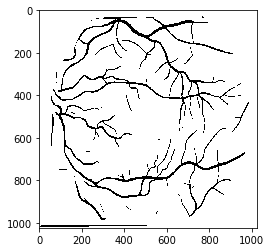

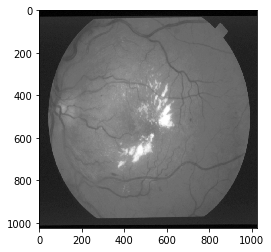

In [63]:
figure(1)
imshow(o_1[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_1,cmap = 'gray')
figure(2)
imshow(gray_img_1,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

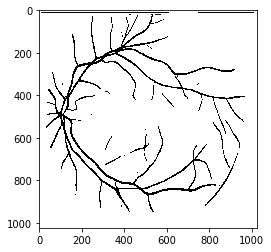

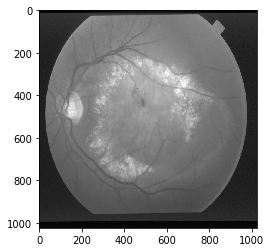

In [64]:
figure(1)
imshow(o_2[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_2,cmap = 'gray')
figure(2)
imshow(gray_img_2,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

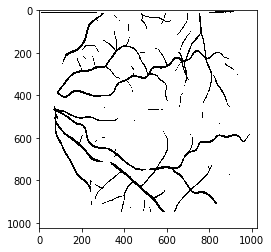

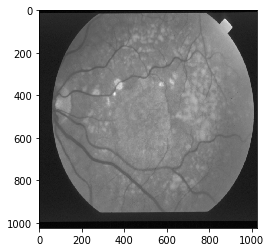

In [65]:
figure(1)
imshow(o_3[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_3,cmap = 'gray')
figure(2)
imshow(gray_img_3,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

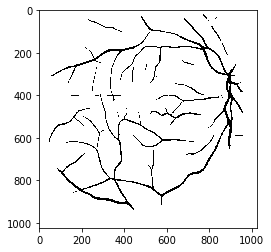

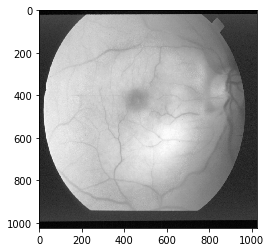

In [66]:
figure(1)
imshow(o_4[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_4,cmap = 'gray')
figure(2)
imshow(gray_img_4,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

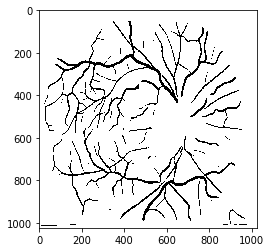

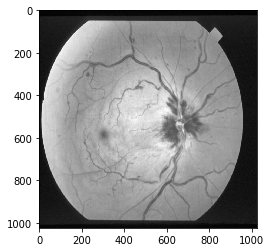

In [67]:
figure(1)
imshow(o_5[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_5,cmap = 'gray')
figure(2)
imshow(gray_img_5,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

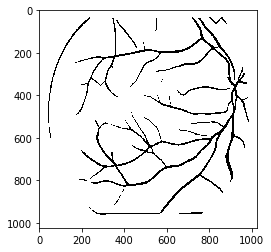

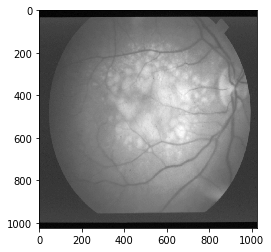

In [68]:
figure(1)
imshow(o_6[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_6,cmap = 'gray')
figure(2)
imshow(gray_img_6,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

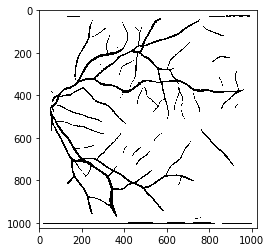

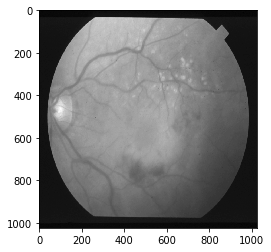

In [69]:
figure(1)
imshow(o_7[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_7,cmap = 'gray')
figure(2)
imshow(gray_img_7,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

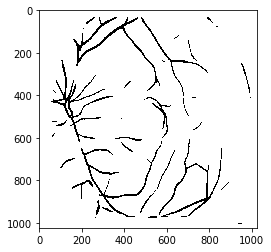

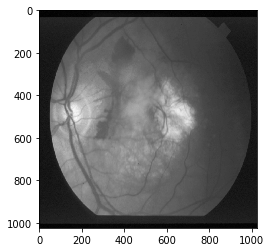

In [70]:
figure(1)
imshow(o_8[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_8,cmap = 'gray')
figure(2)
imshow(gray_img_8,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

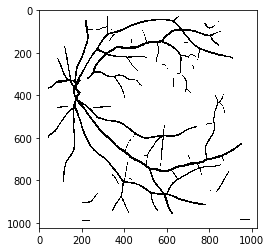

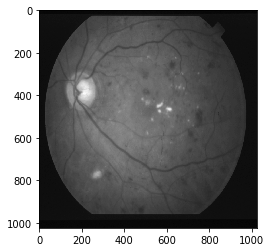

In [71]:
figure(1)
imshow(o_9[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_9,cmap = 'gray')
figure(2)
imshow(gray_img_9,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

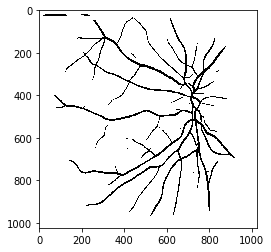

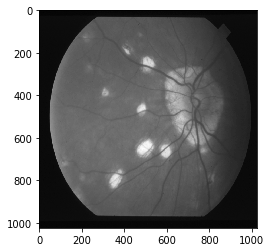

In [72]:
figure(1)
imshow(o_10[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_10,cmap = 'gray')
figure(2)
imshow(gray_img_10,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

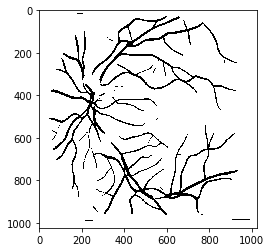

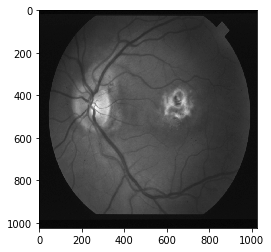

In [73]:
figure(1)
imshow(o_11[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_11,cmap = 'gray')
figure(2)
imshow(gray_img_11,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

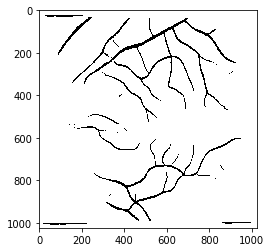

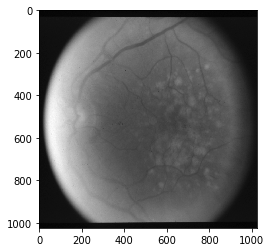

In [74]:
figure(1)
imshow(o_12[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_12,cmap = 'gray')
figure(2)
imshow(gray_img_12,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

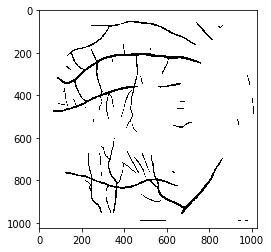

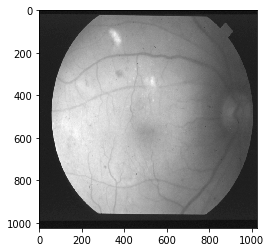

In [75]:
figure(1)
imshow(o_13[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_13,cmap = 'gray')
figure(2)
imshow(gray_img_13,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

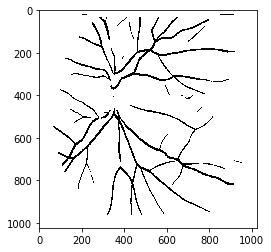

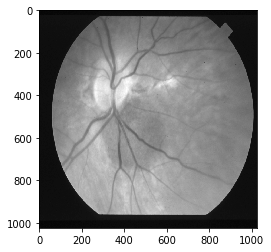

In [76]:
figure(1)
imshow(o_14[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_14,cmap = 'gray')
figure(2)
imshow(gray_img_14,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

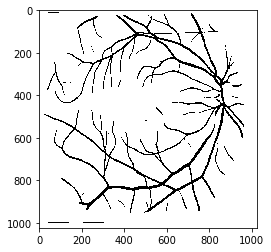

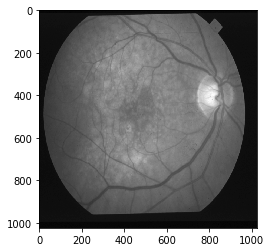

In [77]:
figure(1)
imshow(o_15[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_15,cmap = 'gray')
figure(2)
imshow(gray_img_15,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

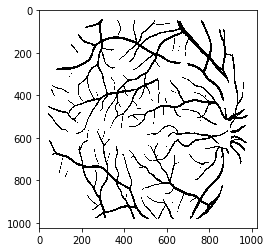

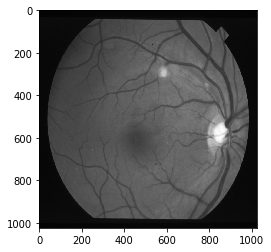

In [78]:
figure(1)
imshow(o_16[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_16,cmap = 'gray')
figure(2)
imshow(gray_img_16,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

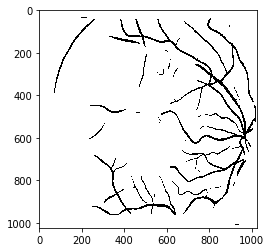

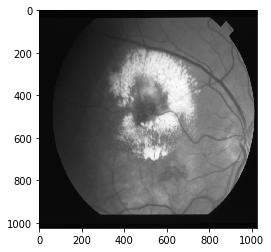

In [83]:
figure(1)
imshow(o_17[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_17,cmap = 'gray')
figure(2)
imshow(gray_img_17,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

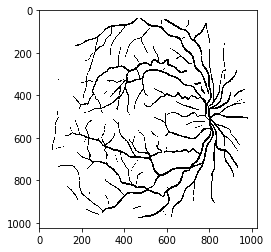

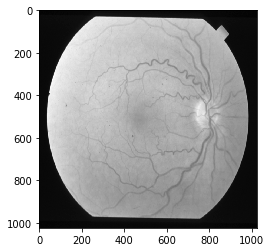

In [82]:
figure(1)
imshow(o_18[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_18,cmap = 'gray')
figure(2)
imshow(gray_img_18,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

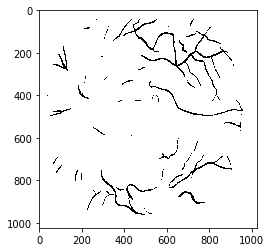

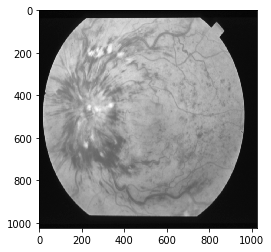

In [84]:
figure(1)
imshow(o_19[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_19,cmap = 'gray')
figure(2)
imshow(gray_img_19,cmap = 'gray')

### First Image: Predicted_Label Second Image: Test_Image_Label Third Image: Test_Image

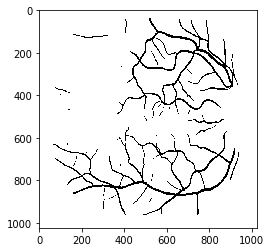

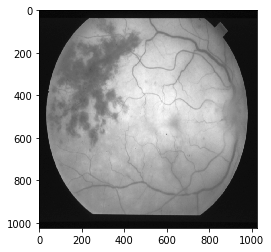

In [85]:
figure(1)
imshow(o_20[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_20,cmap = 'gray')

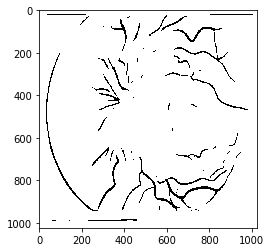

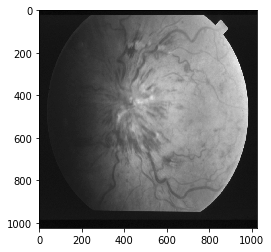

In [86]:
figure(1)
imshow(o_21[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_21,cmap = 'gray')

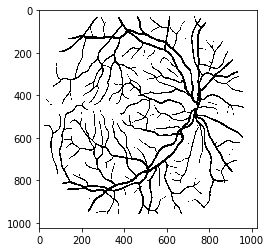

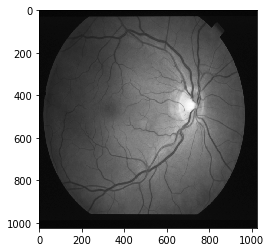

In [87]:
figure(1)
imshow(o_22[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_22,cmap = 'gray')

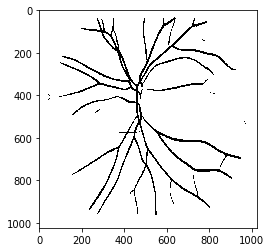

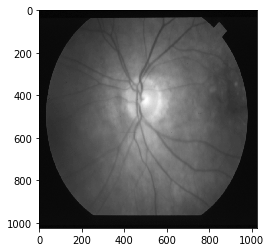

In [88]:
figure(1)
imshow(o_23[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_23,cmap = 'gray')

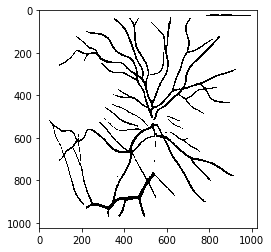

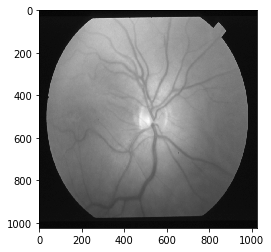

In [89]:
figure(1)
imshow(o_24[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_24,cmap = 'gray')

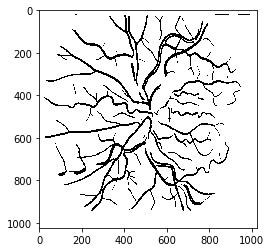

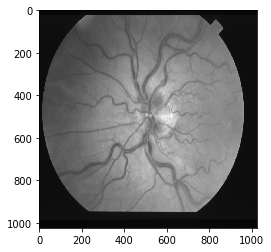

In [90]:
figure(1)
imshow(o_25[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_25,cmap = 'gray')

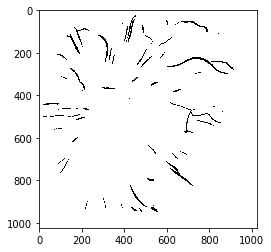

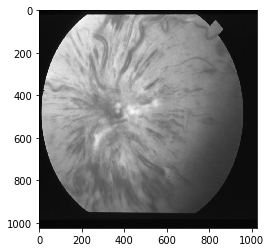

In [91]:
figure(1)
imshow(o_26[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_26,cmap = 'gray')

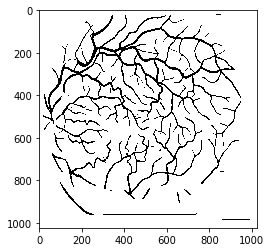

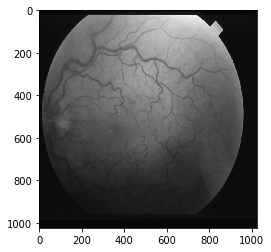

In [92]:
figure(1)
imshow(o_27[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_27,cmap = 'gray')

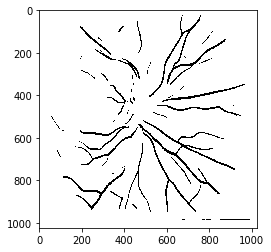

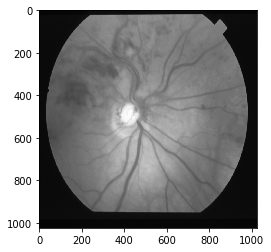

In [93]:
figure(1)
imshow(o_28[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_28,cmap = 'gray')

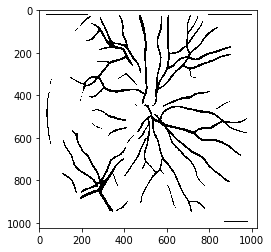

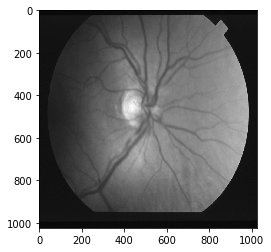

In [94]:
figure(1)
imshow(o_29[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_29,cmap = 'gray')

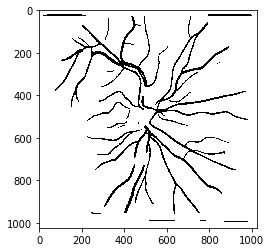

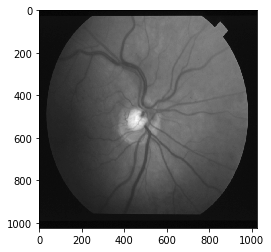

In [95]:
figure(1)
imshow(o_30[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_30,cmap = 'gray')

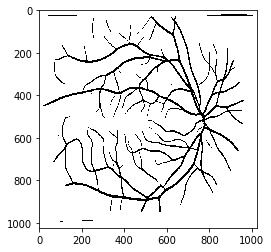

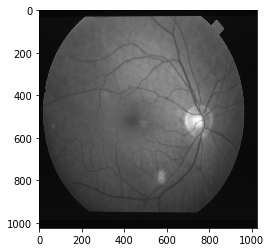

In [96]:
figure(1)
imshow(o_31[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_31,cmap = 'gray')

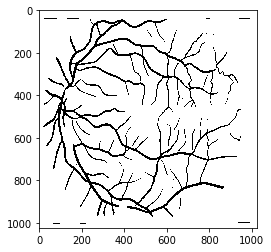

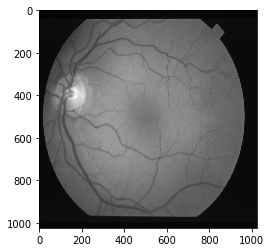

In [97]:
figure(1)
imshow(o_32[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_32,cmap = 'gray')

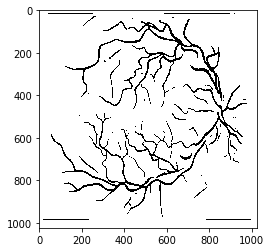

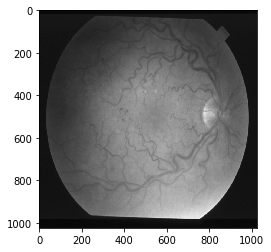

In [98]:
figure(1)
imshow(o_33[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_33,cmap = 'gray')

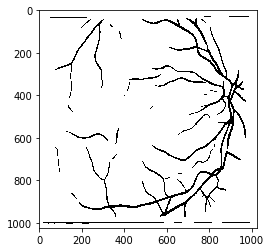

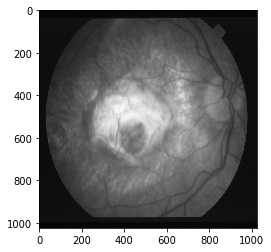

In [99]:
figure(1)
imshow(o_34[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_34,cmap = 'gray')

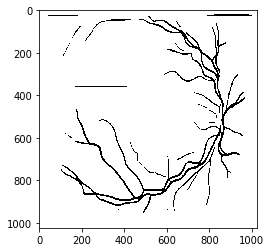

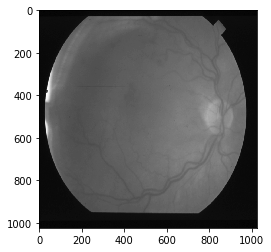

In [100]:
figure(1)
imshow(o_35[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_35,cmap = 'gray')

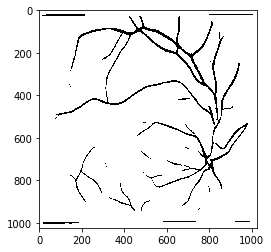

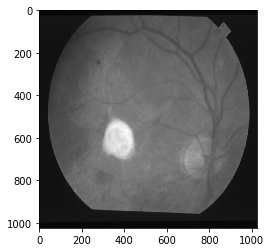

In [101]:
figure(1)
imshow(o_36[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_36,cmap = 'gray')

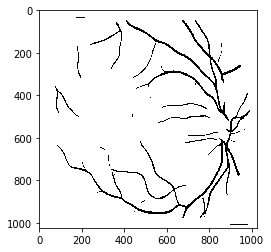

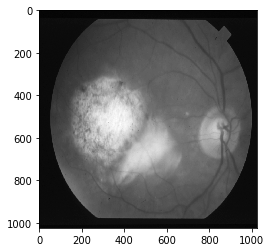

In [102]:
figure(1)
imshow(o_37[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_37,cmap = 'gray')

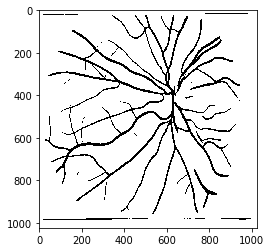

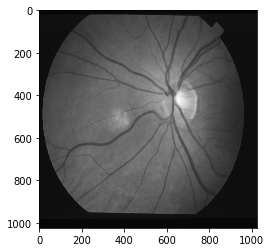

In [103]:
figure(1)
imshow(o_38[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_38,cmap = 'gray')

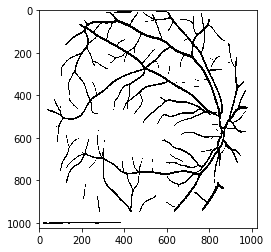

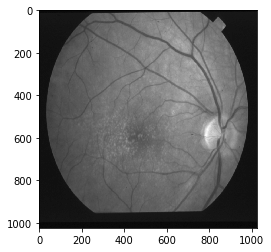

In [104]:
figure(1)
imshow(o_39[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_39,cmap = 'gray')

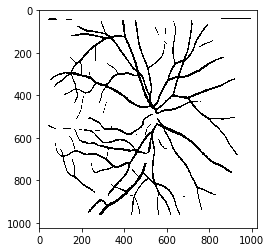

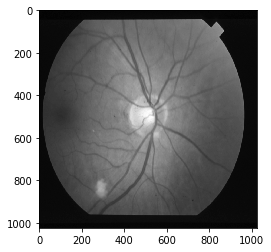

In [105]:
figure(1)
imshow(o_40[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_40,cmap = 'gray')

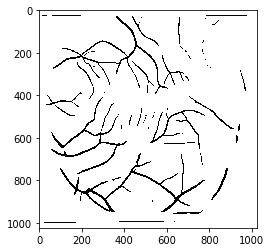

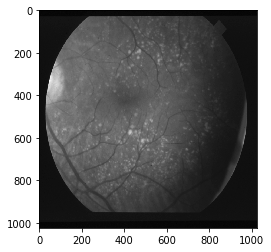

In [106]:
figure(1)
imshow(o_41[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_41,cmap = 'gray')

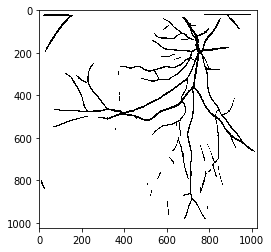

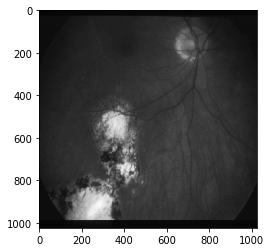

In [107]:
figure(1)
imshow(o_42[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_42,cmap = 'gray')

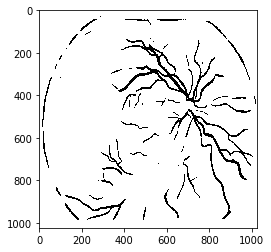

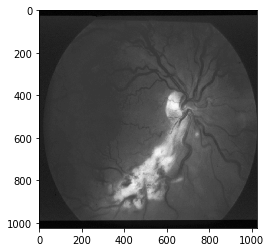

In [108]:
figure(1)
imshow(o_43[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_43,cmap = 'gray')

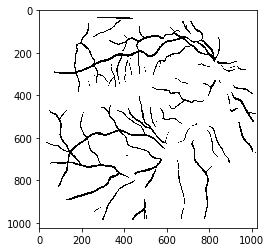

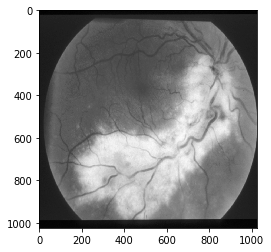

In [109]:
figure(1)
imshow(o_44[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_44,cmap = 'gray')

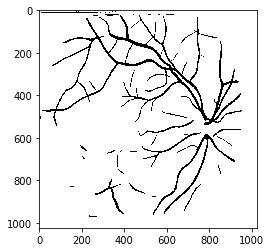

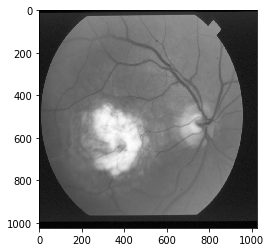

In [110]:
figure(1)
imshow(o_45[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_45,cmap = 'gray')

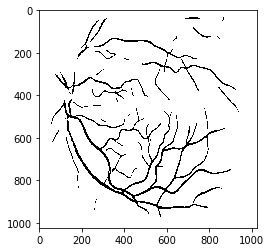

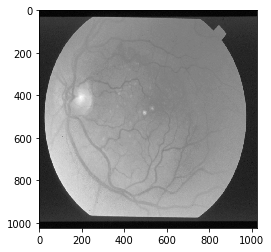

In [111]:
figure(1)
imshow(o_46[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_46,cmap = 'gray')

In [112]:
figure(1)
imshow(o_47[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_47,cmap = 'gray')

NameError: name 'o_47' is not defined

<Figure size 432x288 with 0 Axes>

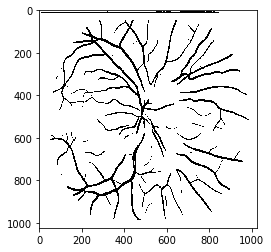

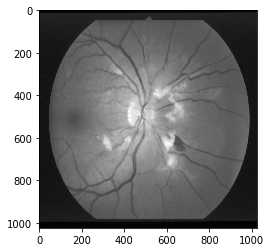

In [113]:
figure(1)
imshow(o_48[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_48,cmap = 'gray')

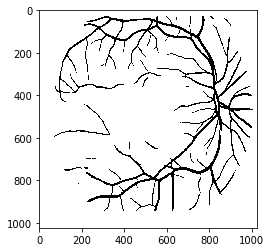

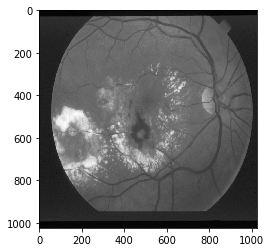

In [114]:
figure(1)
imshow(o_49[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_49,cmap = 'gray')

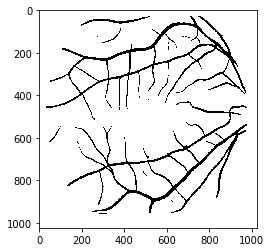

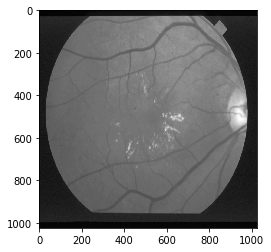

In [115]:
figure(1)
imshow(o_50[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_50,cmap = 'gray')

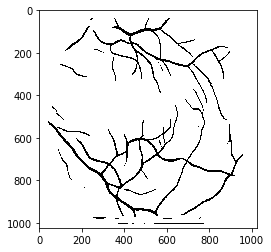

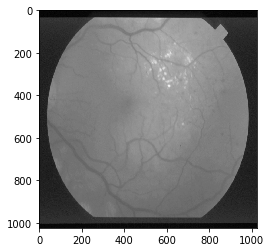

In [116]:
figure(1)
imshow(o_51[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_51,cmap = 'gray')

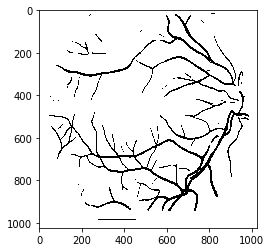

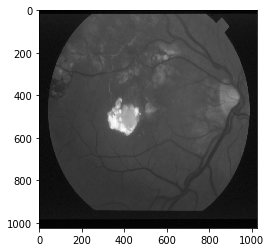

In [117]:
figure(1)
imshow(o_52[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_52,cmap = 'gray')

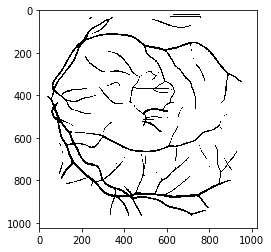

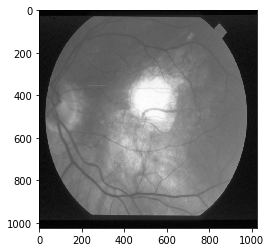

In [118]:
figure(1)
imshow(o_53[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_53,cmap = 'gray')

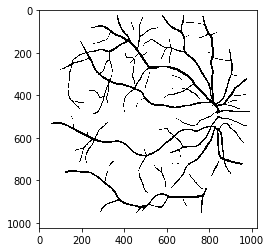

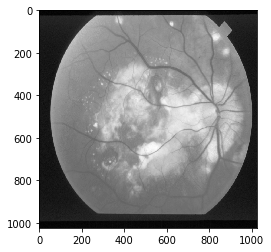

In [119]:
figure(1)
imshow(o_54[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_54,cmap = 'gray')

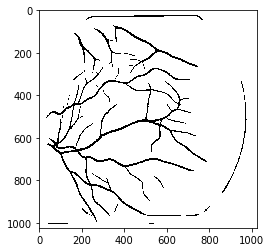

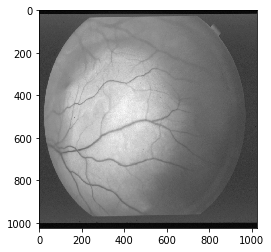

In [120]:
figure(1)
imshow(o_55[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_55,cmap = 'gray')

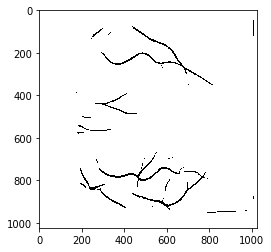

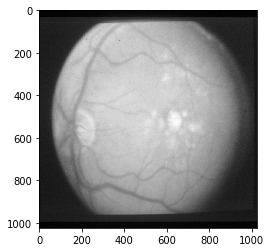

In [121]:
figure(1)
imshow(o_56[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_56,cmap = 'gray')

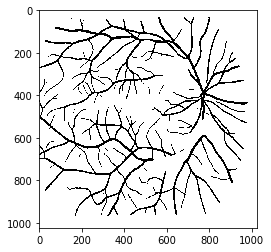

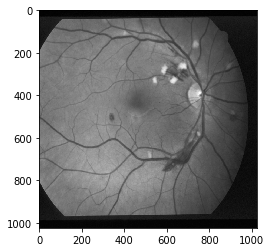

In [122]:
figure(1)
imshow(o_57[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_57,cmap = 'gray')

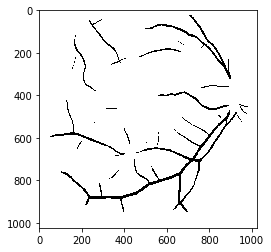

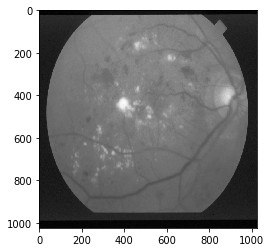

In [123]:
figure(1)
imshow(o_58[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_58,cmap = 'gray')

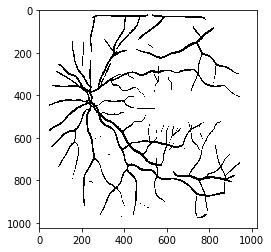

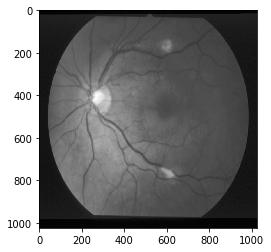

In [124]:
figure(1)
imshow(o_59[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_59,cmap = 'gray')

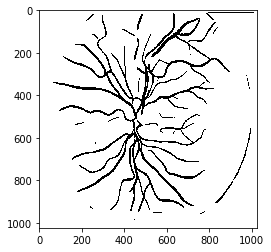

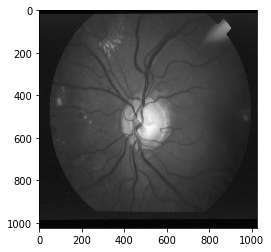

In [125]:
figure(1)
imshow(o_60[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_60,cmap = 'gray')

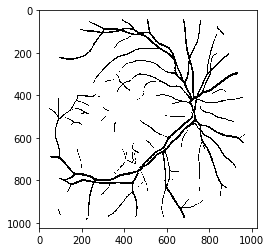

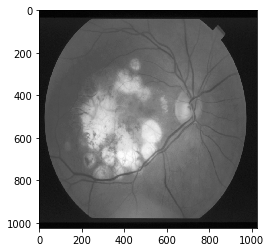

In [126]:
figure(1)
imshow(o_61[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_61,cmap = 'gray')

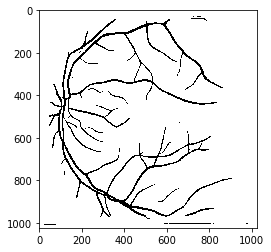

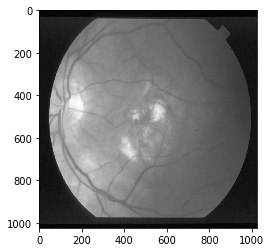

In [127]:
figure(1)
imshow(o_62[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_62,cmap = 'gray')

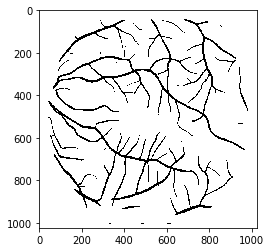

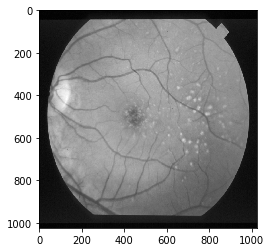

In [128]:
figure(1)
imshow(o_63[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_63,cmap = 'gray')

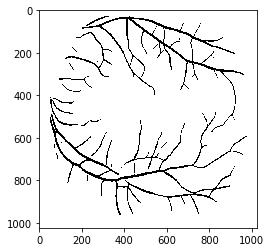

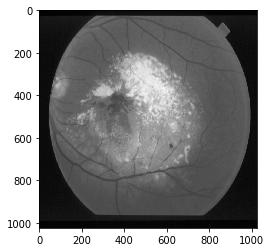

In [129]:
figure(1)
imshow(o_64[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_64,cmap = 'gray')

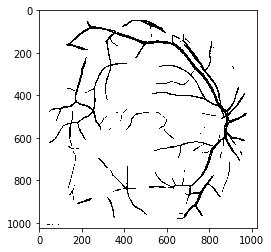

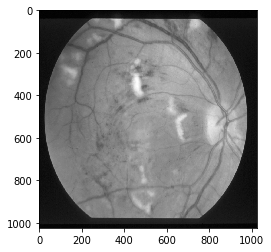

In [130]:
figure(1)
imshow(o_65[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_65,cmap = 'gray')

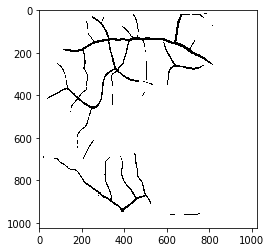

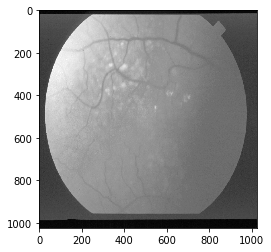

In [131]:
figure(1)
imshow(o_66[0,:,:,0],cmap = 'gray')
# figure(2)
# imshow(gray_out_20,cmap = 'gray')
figure(2)
imshow(gray_img_66,cmap = 'gray')

In [ ]:
# import cv2

In [ ]:
# from keras.models import load_model
# model = load_model('./final_model_2475.h5')

In [ ]:
# %pylab inline

In [ ]:
# in_path = '../data/2472.png'
# #label_path = './../data/labels/1.jpg'

In [ ]:
# img = imread(in_path)
# #label = imread(label_path)

In [ ]:
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
# np.unique(gray)

In [ ]:
# norm_img = (gray)-0.5

In [ ]:
# norm_img.shape

In [ ]:
# norm_img=norm_img.reshape((1,)+norm_img.shape+(1,))

In [ ]:
# norm_img.shape

In [ ]:
# out = model.predict(norm_img)


In [ ]:
# np.unique(out)

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

In [ ]:
# out[out<0.5]=0
# out[out>=0.5]=1

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

# Original Test Image

In [ ]:
# imshow(img,cmap = 'gray')

# Original Label of Test Image

In [ ]:
# imshow(label,cmap='gray')

# Segmented Output

In [ ]:
# imshow(out[0,:,:,0],cmap='gray')

In [ ]:
# out [out <= 0.55]= 0
# out [out > 0.55] = 1

### Left( Segmented Output after threshold of 0.5)     Right(Original Label of Test Image)    

In [ ]:
# subplot(121)
# imshow(out[0,:,:,0],cmap='gray')
# subplot(122)
# imshow(label,cmap='gray')